<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
data[data['sex']=='Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [5]:
data[data['native-country']=='Germany'].shape[0]/data.shape[0]

0.004207487485028101

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

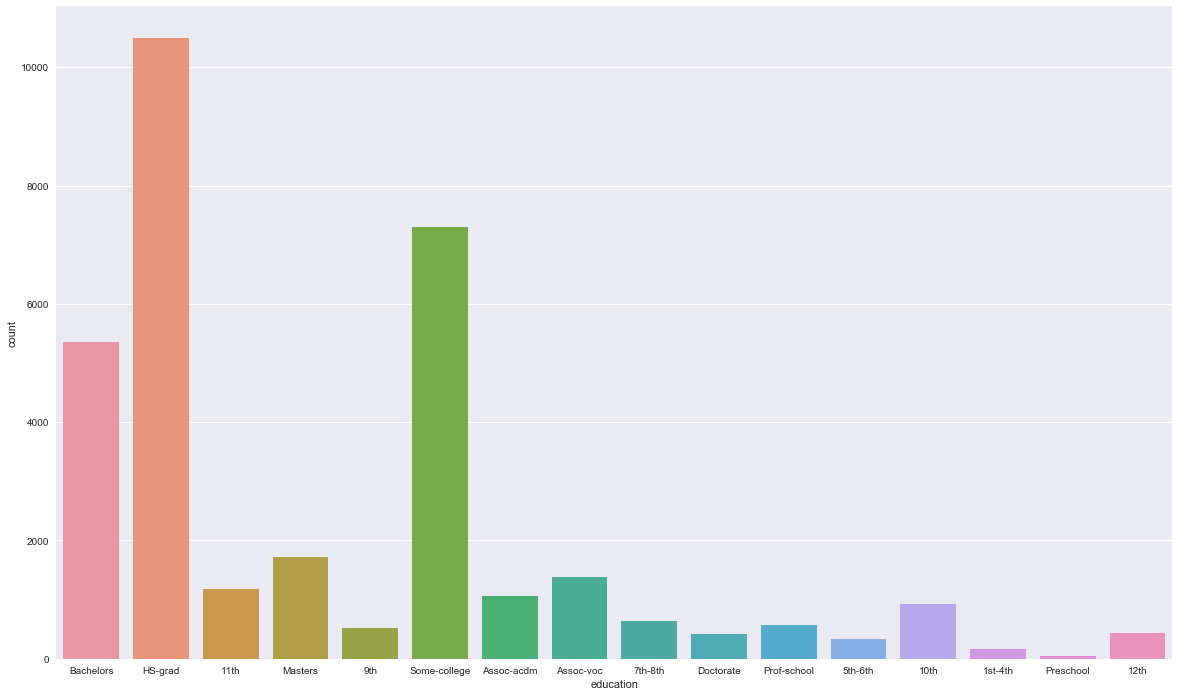

In [7]:
plt.rcParams['figure.figsize'] = (20, 12)
sns.countplot(x='education', data=data)

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [8]:
rich = data[data['salary']=='>50K']
poor = data[data['salary']=='<=50K']
print('>50K mean={0}, std={1}'.format(rich['age'].mean(), rich['age'].std()))
print('<=50K mean={0}, std={1}'.format(poor['age'].mean(), poor['age'].std()))

>50K mean=44.24984058155847, std=10.51902771985177
<=50K mean=36.78373786407767, std=14.020088490824813


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [12]:
data[data['salary']=='>50K']['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th', '10th',
       '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [13]:
data.groupby(['race', 'sex'])['age'].describe()

race                sex          
Amer-Indian-Eskimo  Female  count      119.000000
                            mean        37.117647
                            std         13.114991
                            min         17.000000
                            25%         27.000000
                            50%         36.000000
                            75%         46.000000
                            max         80.000000
                    Male    count      192.000000
                            mean        37.208333
                            std         12.049563
                            min         17.000000
                            25%         28.000000
                            50%         35.000000
                            75%         45.000000
                            max         82.000000
Asian-Pac-Islander  Female  count      346.000000
                            mean        35.089595
                            std         12.300845
                

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [24]:
maried_men = data[(data['sex']=='Male') & (data['marital-status'].str.startswith('Married'))]
maried_men['salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [23]:

not_maried_men = data[(data['sex']=='Male') & (~data['marital-status'].str.startswith('Married'))]
not_maried_men['salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [25]:
max_hours = data['hours-per-week'].max()
workaholics = data[data['hours-per-week']==max_hours]
print('max hour={0}\nnumber of people={1}\npercent of rich={2}'
      .format(max_hours, 
              workaholics.shape[0], 
              workaholics[workaholics['salary']=='>50K'].shape[0]/workaholics.shape[0]))

max hour=99
number of people=85
percent of rich=0.29411764705882354


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [26]:
data.groupby(['native-country','salary'])['hours-per-week'].mean()

native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc

In [28]:
pd.crosstab(data['salary'], data['native-country'], values=data['hours-per-week'], aggfunc='mean')

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
